In [2]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\sahithi\Downloads\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# checking for null values

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

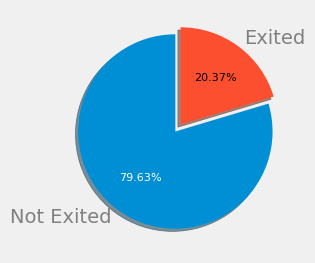

In [7]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

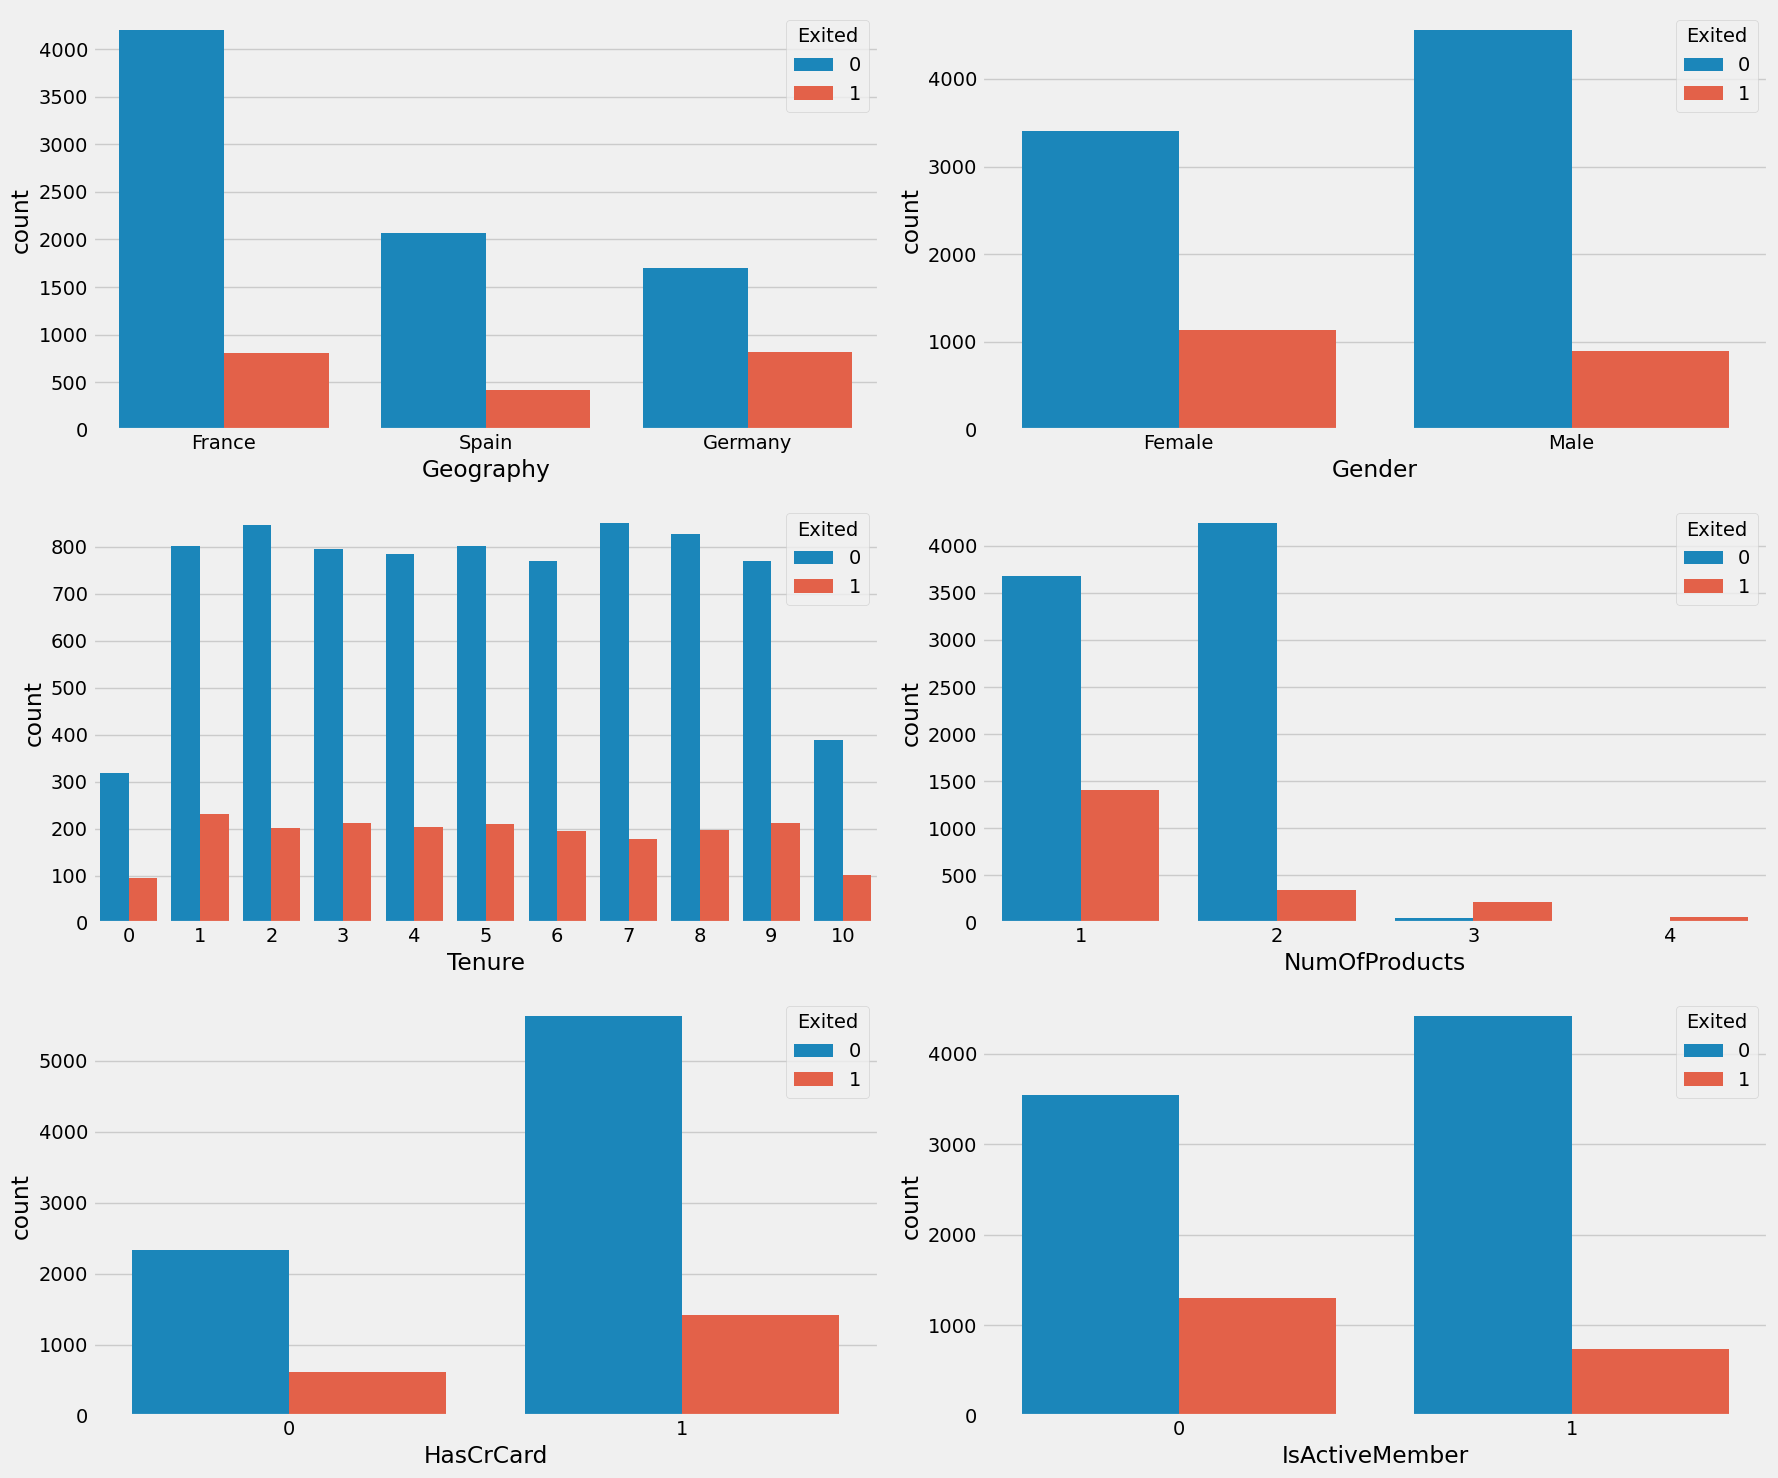

In [8]:
# visualizing categorical variables

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1])

plt.tight_layout()
plt.show()

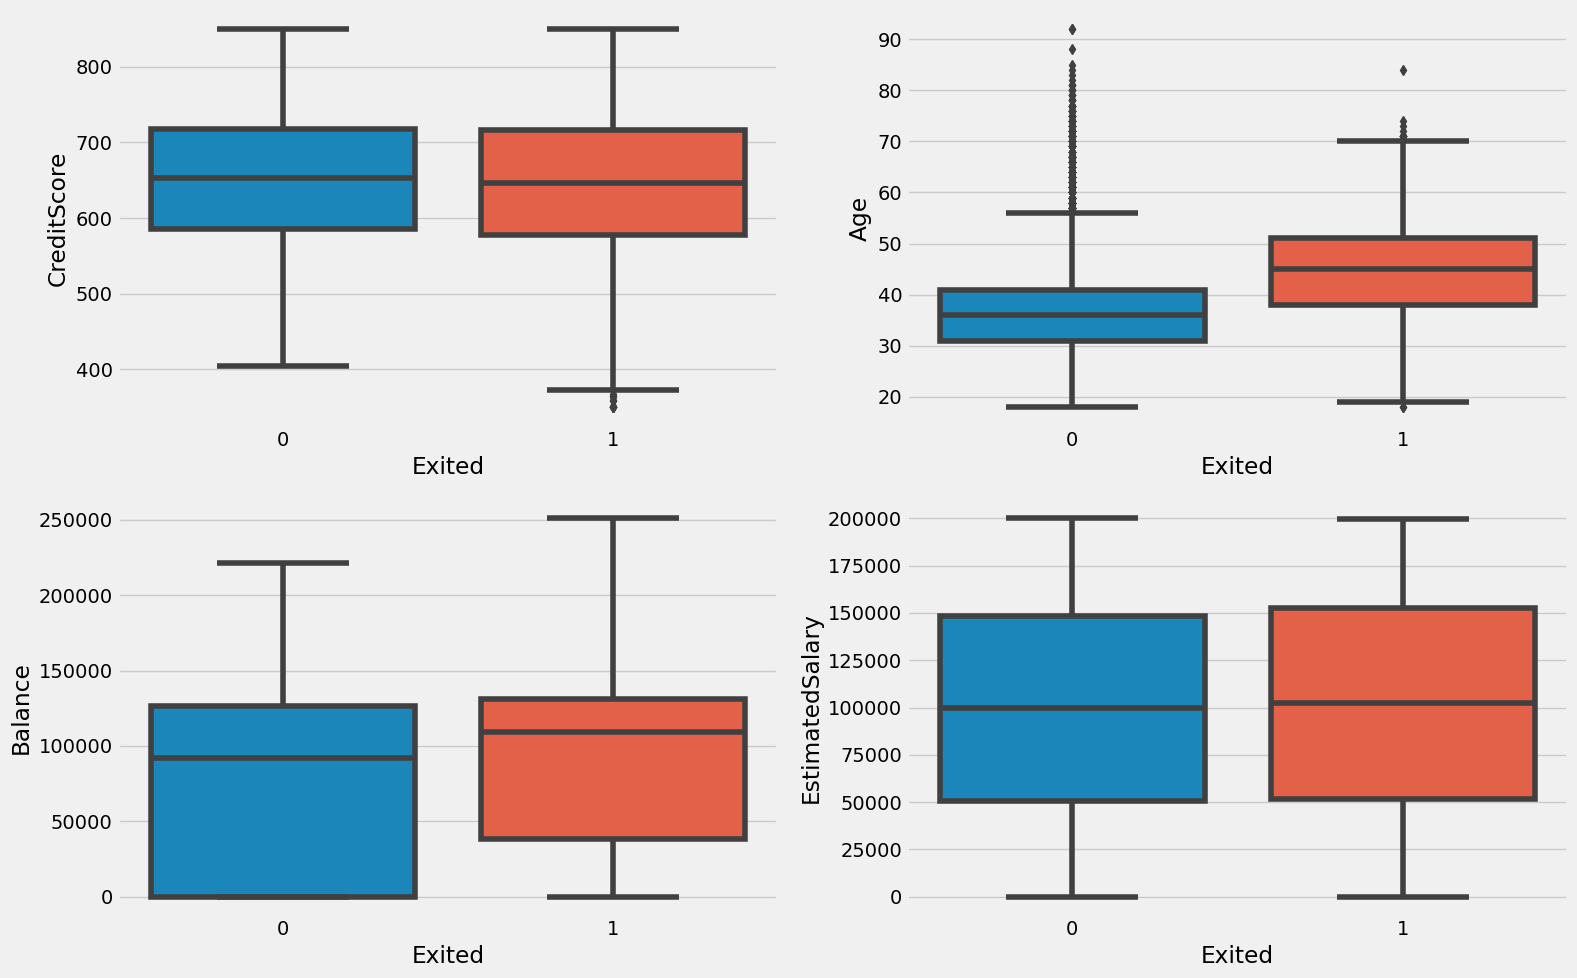

In [9]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

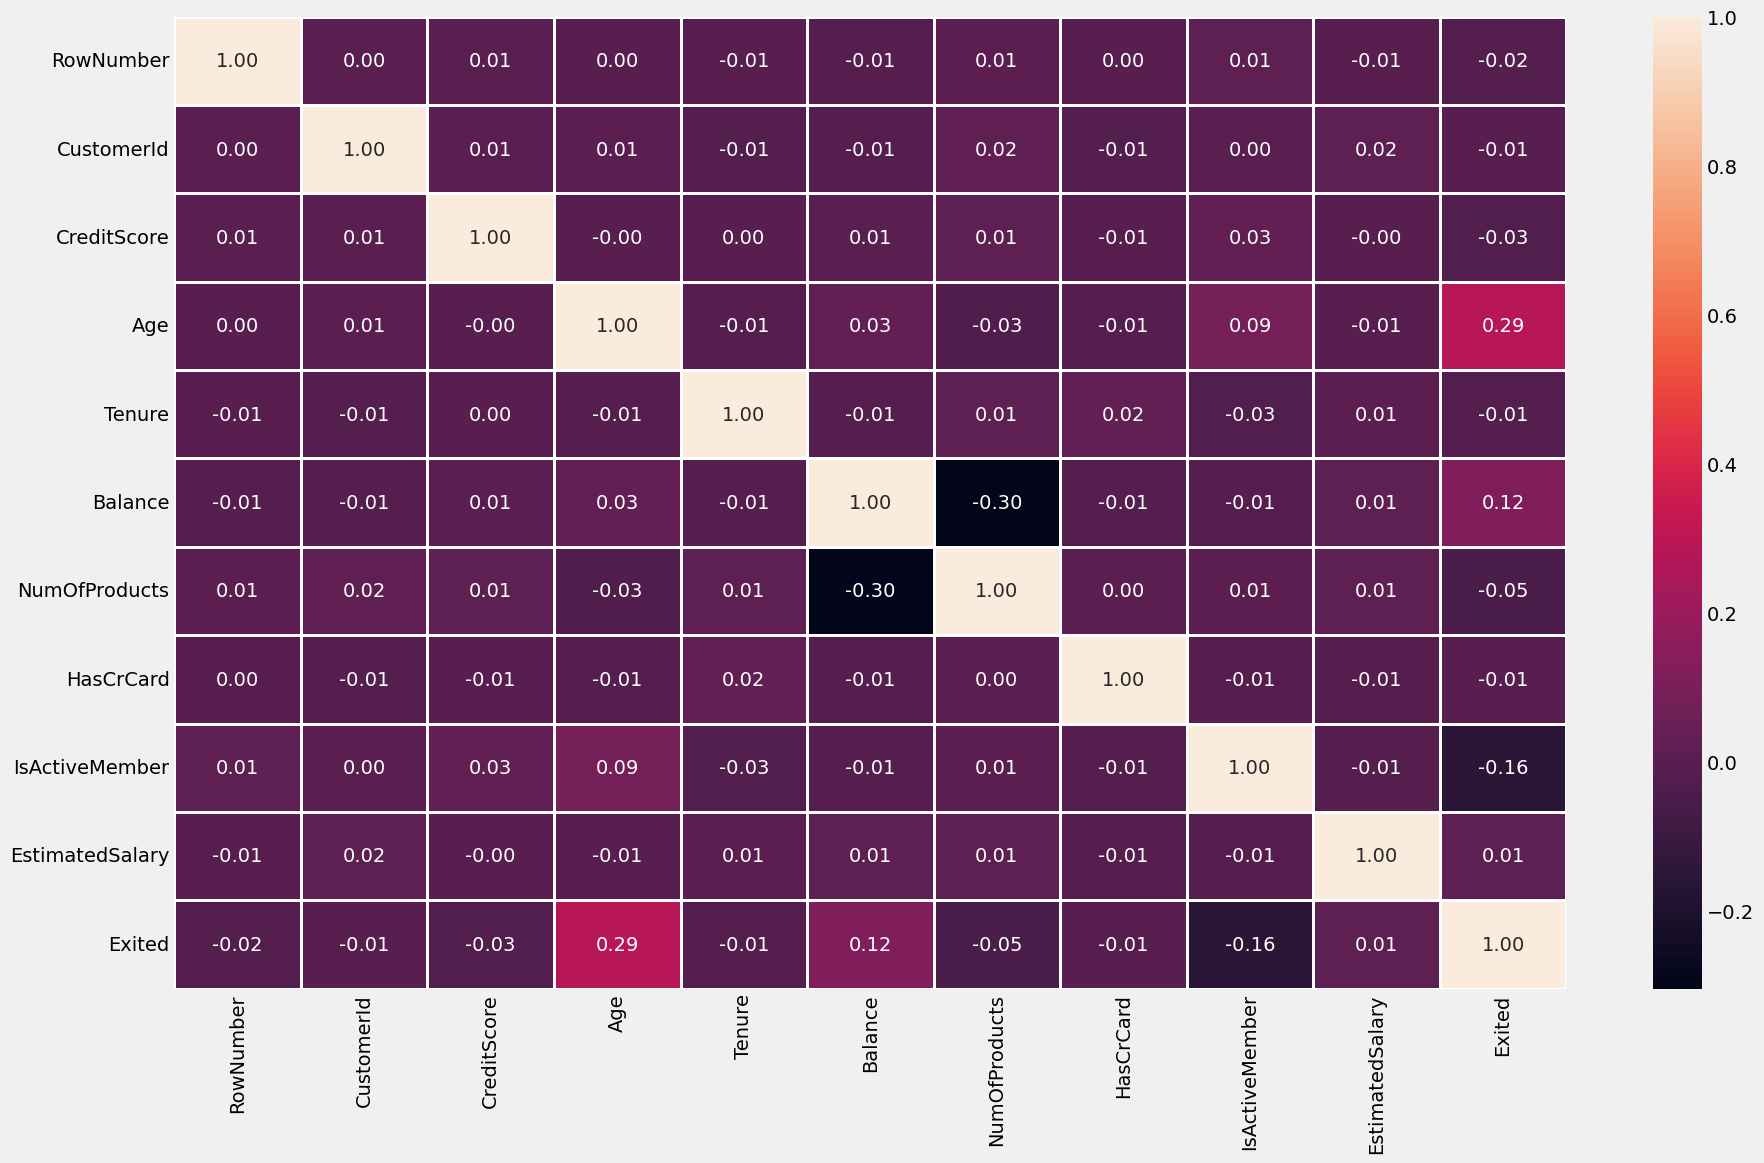

In [10]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [11]:
# dropping useless columns 

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
# Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# creating features and label 

from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [16]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 [==============================] - 6s 9ms/step - loss: 0.6056 - accuracy: 0.6881 - val_loss: 0.5437 - val_accuracy: 0.7932
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.4433 - accuracy: 0.8216 - val_loss: 0.4168 - val_accuracy: 0.8240
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3891 - accuracy: 0.8413 - val_loss: 0.3785 - val_accuracy: 0.8492
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.3824 - accuracy: 0.8444 - val_loss: 0.3704 - val_accuracy: 0.8504
Epoch 5/100
235/235 [==============================] - 2s 6ms/step - loss: 0.3790 - accuracy: 0.8391 - val_loss: 0.3689 - val_accuracy: 0.8448
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3742 - accuracy: 0.8452 - val_loss: 0.3676 - val_accuracy: 0.8472
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3739 - accuracy: 0.8451 - val_loss: 0.3720 - val_accuracy: 0.8472

Epoch 58/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3583 - accuracy: 0.8516 - val_loss: 0.3619 - val_accuracy: 0.8496
Epoch 59/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3633 - accuracy: 0.8491 - val_loss: 0.3606 - val_accuracy: 0.8548
Epoch 60/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3593 - accuracy: 0.8436 - val_loss: 0.3615 - val_accuracy: 0.8556
Epoch 61/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3602 - accuracy: 0.8504 - val_loss: 0.3621 - val_accuracy: 0.8528
Epoch 62/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3630 - accuracy: 0.8468 - val_loss: 0.3626 - val_accuracy: 0.8544
Epoch 63/100
235/235 [==============================] - 2s 8ms/step - loss: 0.3605 - accuracy: 0.8499 - val_loss: 0.3616 - val_accuracy: 0.8516
Epoch 64/100
235/235 [==============================] - 2s 9ms/step - loss: 0.3626 - accuracy: 0.8481 - val_loss: 0.3622 - val_accuracy:

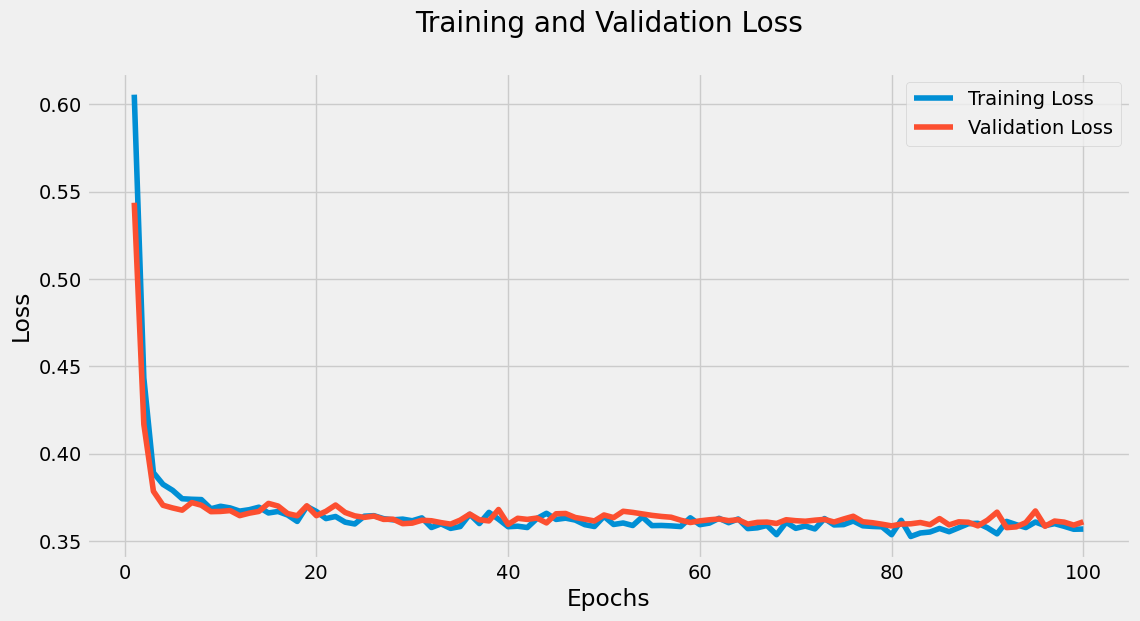

In [19]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

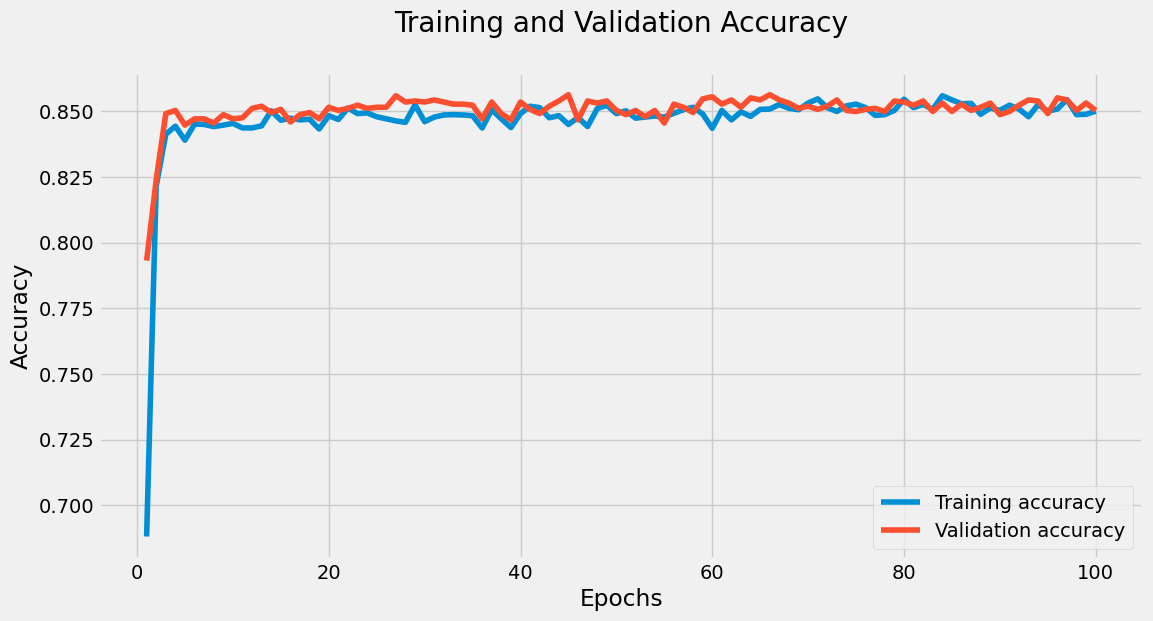

In [20]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.8504
Accuracy of model is 0.8503999710083008


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                        

In [23]:
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.6))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.6))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 [==============================] - 4s 6ms/step - loss: 0.6418 - accuracy: 0.7415 - val_loss: 0.5743 - val_accuracy: 0.7932
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5132 - accuracy: 0.7865 - val_loss: 0.4730 - val_accuracy: 0.7924
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4764 - accuracy: 0.7952 - val_loss: 0.4629 - val_accuracy: 0.7940
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4713 - accuracy: 0.7935 - val_loss: 0.4558 - val_accuracy: 0.7928
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4570 - accuracy: 0.7999 - val_loss: 0.4476 - val_accuracy: 0.7976
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4652 - accuracy: 0.7955 - val_loss: 0.4454 - val_accuracy: 0.8020
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4675 - accuracy: 0.7953 - val_loss: 0.4427 - val_accuracy: 0.7996

Epoch 58/100
235/235 [==============================] - 2s 10ms/step - loss: 0.4410 - accuracy: 0.8207 - val_loss: 0.4029 - val_accuracy: 0.8284
Epoch 59/100
235/235 [==============================] - 2s 9ms/step - loss: 0.4451 - accuracy: 0.8173 - val_loss: 0.4211 - val_accuracy: 0.8132
Epoch 60/100
235/235 [==============================] - 2s 10ms/step - loss: 0.4439 - accuracy: 0.8181 - val_loss: 0.4020 - val_accuracy: 0.8300
Epoch 61/100
235/235 [==============================] - 2s 10ms/step - loss: 0.4505 - accuracy: 0.8191 - val_loss: 0.4011 - val_accuracy: 0.8352
Epoch 62/100
235/235 [==============================] - 2s 9ms/step - loss: 0.4477 - accuracy: 0.8153 - val_loss: 0.4021 - val_accuracy: 0.8332
Epoch 63/100
235/235 [==============================] - 1s 6ms/step - loss: 0.4443 - accuracy: 0.8173 - val_loss: 0.3978 - val_accuracy: 0.8356
Epoch 64/100
235/235 [==============================] - 1s 6ms/step - loss: 0.4400 - accuracy: 0.8181 - val_loss: 0.3960 - val_accura

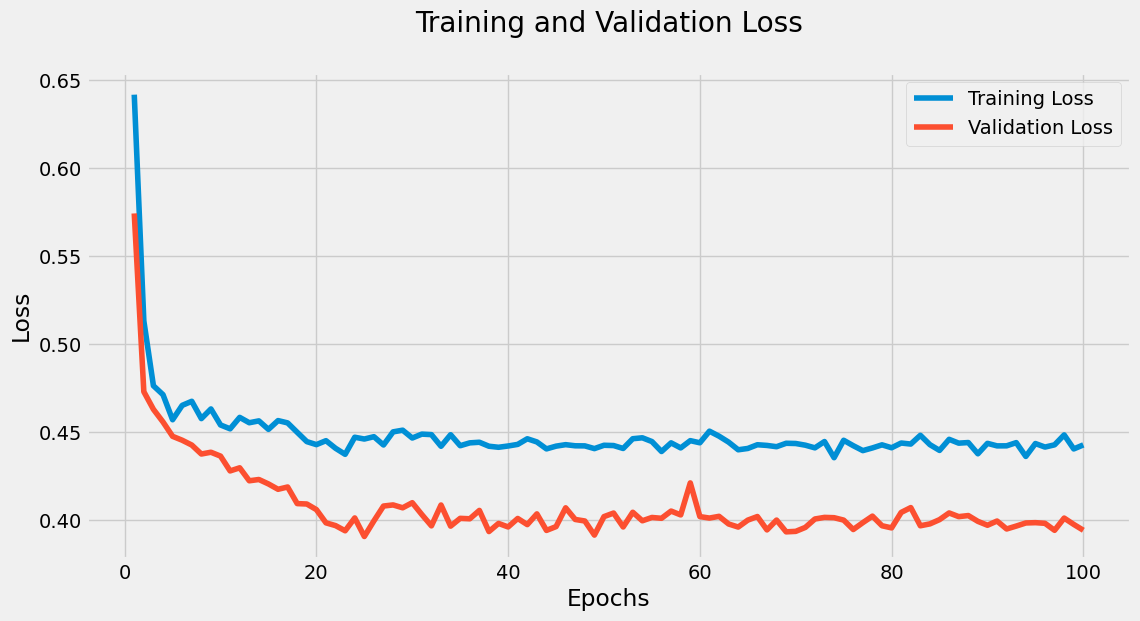

In [24]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

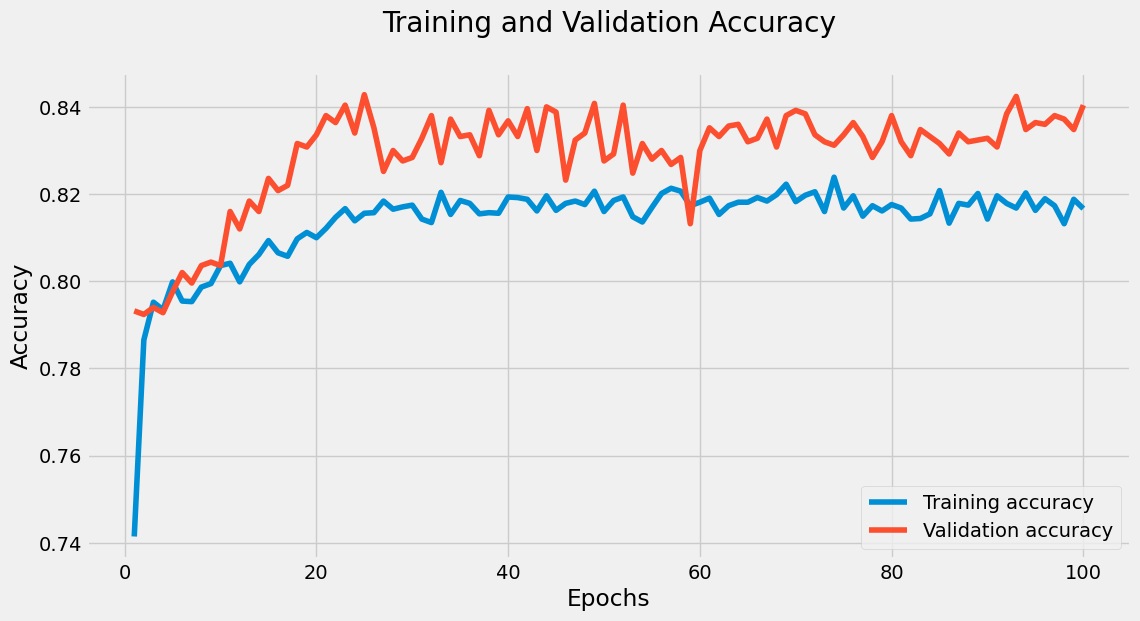

In [25]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 101)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8404
Accuracy of model is 0.840399980545044
